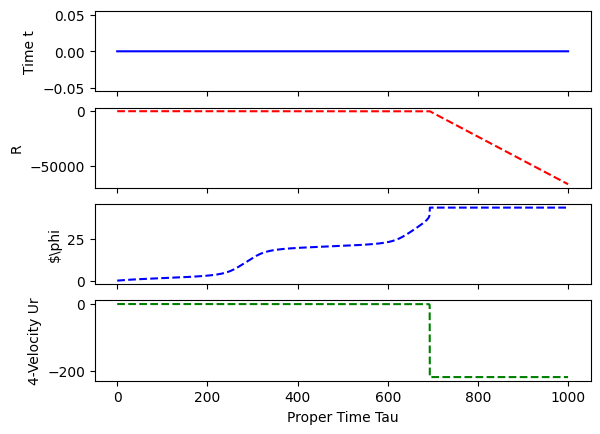

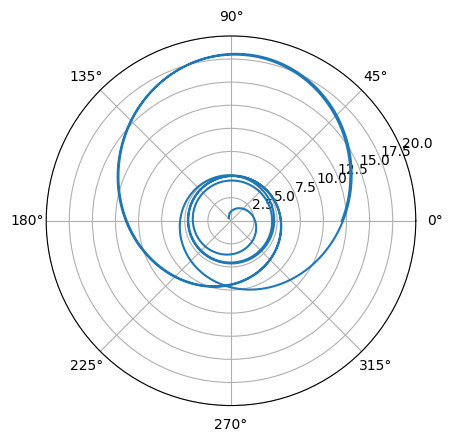

In [1]:
from scipy.integrate import odeint as ode
import numpy as np
import matplotlib.pyplot as plt

# e = float(input('Enter e: '))
# l = float(input('Enter lz: '))
# r0 = float(input('Enter r0: '))
global e, l, r0, T, u0, t, r, P, u
e = 0.9622504
l = 3.6756
r0 = 12

n = 10001
T = np.linspace(0, 1000, n)

u0 = np.sqrt((e ** 2) - ((1 - 2 / r0) * (((l ** 2) / (r0 ** 2)) + 1)))

t = np.empty_like(T)
r = np.empty_like(T)
P = np.empty_like(T)
u = np.empty_like(T)

# initial conditions
z0 = [0, r0, 0, u0]
t[0] = 0
r[0] = r0
P[0] = 0
u[0] = u0

def EquationsofMotion(t, r, P, u, T):
    t= z0[0]
    r= z0[1]
    P= z0[2]
    u = z0[3]
    #Schwartz Metric
    dtdT = e * ((1 - (2 / r)) ** (-1))*0
    drdT = u
    dPdT = l / (r ** 2)
    dudT = -(1 / r ** 2) + ((l ** 2) / (r ** 3)) - 3 * ((l ** 2) / (r ** 4))

    dzdT = [dtdT, drdT, dPdT, dudT]
    return dzdT


for i in range(1, n):

    z = ode(EquationsofMotion, z0, T, args=(e, l, r0))
    t[i] = z[0][0]
    r[i] = z[0][1]
    P[i] = z[0][2]
    u[i] = z[0][3]
    z0 = z[1]

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
ax1.plot(T, t, 'b-', label='t(Tau)')
ax1.set_ylabel('Time t')


ax2.plot(T, r, 'r--', label='R (Tau)')
ax2.set_ylabel('R')


ax3.plot(T, P, 'b--', label='P(Tau)')
ax3.set_ylabel('$\phi')


ax4.plot(T, u, 'g--', label='u(Tau)')
ax4.set_ylabel('4-Velocity Ur')
plt.xlabel('Proper Time Tau')

fig2, (ax5) = plt.subplots(1, subplot_kw=dict(projection = 'polar'),)
ax5.set_rlim([0,20])
ax5.plot(P,r)

plt.show()



In [2]:
import numpy as np
import sys
import os
sys.path.insert(0,os.path.abspath('/home/jacob/Desktop/NeutronStar'))
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm     #import package to calculate spherical harmonics


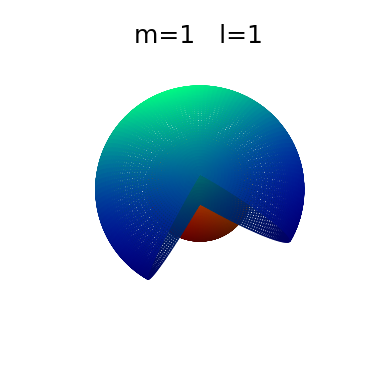

In [5]:
theta = np.linspace(0, 2*np.pi, 100)   #setting range for theta
phi = np.linspace(0, np.pi, 100)       #setting range for phi
phi, theta = np.meshgrid(phi, theta)   #setting the grid for phi and theta

#Setting the cartesian coordinates of the unit sphere
#Converting phi, theta, z to cartesian coordinates
x = np.sin(phi)*np.cos(theta) 
y = np.sin(phi)*np.sin(theta)
z = np.cos(phi)

m, l = 1, 1   #m and l control the mode of pulsation and overall appearance of the figure

#Calculating the spherical harmonic Y(l,m) and normalizing it

figcolors = sph_harm(m, l, theta, phi).real
figmax, figmin = figcolors.max(), figcolors.min()
figcolors = (figcolors-figmin)/(figmax-figmin)

#Setting the aspect ratio to 1 which makes the sphere look spherical and not elongated

#Sets the plot surface and colors of the figure where seismic is the color scheme

#yellow zones are cooler and compressed, red zones are warmer and expanded


t=0

herx1P = 1.2
w=0#2*np.pi/herx1P
alp = 0#0.01
step = 20
for idx, angle in enumerate(np.arange(0, 20, step)):
    t=t+(360/step)
    #print(t)
    theta = np.linspace(0, 2*np.pi, 100)   #setting range for theta
    phi = np.linspace(0, np.pi, 100)       #setting range for phi
    phi, theta = np.meshgrid(phi, theta)   #setting the grid for phi and theta

    x = np.sin(phi)*np.cos((theta+w*t+(0.5)*alp*t*t))
    y = np.sin(phi)*np.sin((theta+w*t+(0.5)*alp*t*t))
    z = np.cos(phi)


    Crust = pd.DataFrame()


    theta2 = np.linspace(0.5*np.pi, 2*np.pi, 100)   #setting range for theta
    phi2 = np.linspace(0, np.pi, 100)       #setting range for phi
    phi2, theta2 = np.meshgrid(phi2, theta2)   #setting the grid for phi and theta

    x2 = np.sin(phi2)*np.cos((theta2+w*t))
    y2 = np.sin(phi2)*np.sin((theta2+w*t))
    z2 = np.cos(phi2)

    Crustx = 2*x2
    Crusty = 2*y2
    Crustz = 2*z2


    fig = plt.figure(figsize=plt.figaspect(1.))
    axes = fig.add_subplot(111, projection='3d')
    axes.set_axis_off()
    fig.suptitle(f'm={m}   l={l}', fontsize=18, x=0.52, y=.85)



    axes.plot_surface(Crustx, Crusty, Crustz,  rstride=1, cstride=1,  facecolors=cm.winter(figcolors),alpha=0.1)
    axes.plot_surface(x, y, z,  rstride=1, cstride=1,  facecolors=cm.autumn(figcolors),alpha =1)

    angle = 30
    axes.view_init(80, angle)
    plt.draw()

    #Turn off the axis planes so only the sphere is visible


    plt.savefig('/home/jacob/Desktop/NeutronStar/m4_l4-%04d.png' % idx)          #saves a .png file of my figure
    plt.show()
    plt.close()


!convert m4_l4*.png m4_l4.gif


In [6]:
theta = np.linspace(0, 2*np.pi, 100)   #setting range for theta
phi = np.linspace(0, np.pi, 100)       #setting range for phi
phi, theta = np.meshgrid(phi, theta)   #setting the grid for phi and theta

#Setting the cartesian coordinates of the unit sphere
#Converting phi, theta, z to cartesian coordinates
x = np.sin(phi)*np.cos(theta) 
y = np.sin(phi)*np.sin(theta)
z = np.cos(phi)

m, l = 1, 1   #m and l control the mode of pulsation and overall appearance of the figure

#Calculating the spherical harmonic Y(l,m) and normalizing it

figcolors = sph_harm(m, l, theta, phi).real
figmax, figmin = figcolors.max(), figcolors.min()
figcolors = (figcolors-figmin)/(figmax-figmin)

#Setting the aspect ratio to 1 which makes the sphere look spherical and not elongated

#Sets the plot surface and colors of the figure where seismic is the color scheme

#yellow zones are cooler and compressed, red zones are warmer and expanded


t=0

herx1P = 1.2
w=0#2*np.pi/herx1P
alp = 0#0.01
step = 20
for idx, angle in enumerate(np.arange(0, 20, step)):
    t=t+(360/step)
    #print(t)
    theta = np.linspace(0, 2*np.pi, 100)   #setting range for theta
    phi = np.linspace(0, np.pi, 100)       #setting range for phi
    phi, theta = np.meshgrid(phi, theta)   #setting the grid for phi and theta

    x = np.sin(phi)*np.cos((theta+w*t+(0.5)*alp*t*t))
    y = np.sin(phi)*np.sin((theta+w*t+(0.5)*alp*t*t))
    z = np.cos(phi)


    Crust = pd.DataFrame()


    theta2 = np.linspace(0.5*np.pi, 2*np.pi, 100)   #setting range for theta
    phi2 = np.linspace(0, np.pi, 100)       #setting range for phi
    phi2, theta2 = np.meshgrid(phi2, theta2)   #setting the grid for phi and theta

    x2 = np.sin(phi2)*np.cos((theta2+w*t))
    y2 = np.sin(phi2)*np.sin((theta2+w*t))
    z2 = np.cos(phi2)

    Crustx = 2*x2
    Crusty = 2*y2
    Crustz = 2*z2


    fig = mlab.figure()
    ax_ranges = [-3,3,-3,3,-3,3]
    ax_scale = [1,1,1]
    ax_extent = ax_ranges * np.repeat(ax_ranges,2)

    surf3 = mlab.surf(Crustx,Crusty,Crustz,colormap = 'Blues')
    surf4 = mlab.surf(x,y,z, colormap='Oranges')
    
    surf3.actor.actor.scale = ax_scale
    surf4.actor.actor.scale = ax_scale
    
    mlab.view(60,74,17,[-2.5,-4.6,-0.3])
    mlab.outline(surf3,color=(0.7,.7,.7),extent = ax_extent)
    mlab.axes(surf3,color=(.7,.7,.7),extent=ax_extent,ranges=ax_ranges,xlabel='x',ylabel='y',zlabel='z')
    
    
    
    #Turn off the axis planes so only the sphere is visible


#!convert m4_l4*.png m4_l4.gif


NameError: name 'mlab' is not defined